In [1]:
import pandas as pd
import numpy as np
import math


import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
base_dir = "Data/"

label2one = {'B':0,'S':1,'X':2}
one2label = {0:'B', 1:'S', 2:'X'}

def normalize(data):
    mu = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return mu, std, (data-mu)/std

vfunc = np.vectorize(lambda x:label2one[x])

input_labels = ['pitcher','batter', 'pitch_type','x0','x','y','ax','ay','az','px','pz','sz_top','sz_bot',
             'vx0','vy0','vz0','pfx_x','z0','start_speed','end_speed',
             'break_y','break_angle','break_length','spin_dir','spin_rate',
             'inning','balls','strikes'
             ]
#input_labels = ['pitcher','batter', 'pitch_type','balls', 'strikes','inning','pitch_count']
#input_labels = ['pitcher','batter', 
       #'on_1b', 'on_2b', 'on_3b', 'pitch_type', 'side', 
       #'inning', 'pitch_count', 'balls', 'strikes','offense_score', 'defense_score', 
#       'ay', 'px', 'ax',  
#       'sz_bot', 'vz0', 'vy0', 'pfx_x',
#       'type_confidence', 'z0', 'tfs', 'pz', 'start_speed', 'az', 'zone',
#       'break_angle', 'spin_dir', 'end_speed', 'vx0', 'sz_top', 'nasty',
#       'pfx_z', 'break_y', 'x', 'spin_rate',
#       'y0', 'break_length', 'y', 'x0'
#       ]
feature_length = len(input_labels)-3
print("Feature length:{}".format(feature_length))
train_years = [4,5,6]
dev_years = [7]


train_x = {}
train_y = {}
ctr = 0
for y in train_years:
    filename= base_dir+"MLB_201{0}/MLB_PitchFX_201{0}_RegularSeason.csv".format(str(y))
    print("Loading {}".format(filename))
    f = pd.read_csv(filename)
    
    tmp_x = f[input_labels]
    tmp_y = f['umpcall']

    tmp_x = tmp_x.as_matrix()
    tmp_y = tmp_y.as_matrix()
    tmp_y = vfunc(tmp_y)

    if ctr==0:
        ctr=1
        train_x = tmp_x
        train_y = tmp_y
    else:
        print(train_x.shape)
        print(tmp_x.shape)
        train_x = np.concatenate((train_x, tmp_x), axis=0)
        train_y = np.concatenate((train_y, tmp_y), axis=0)
    
    filename= base_dir+"MLB_201{0}/MLB_PitchFX_201{0}_PostSeason.csv".format(str(y))
    print("Loading {}".format(filename))
    f = pd.read_csv(filename)
    
    tmp_x = f[input_labels]
    tmp_y = f['umpcall']

    tmp_x = tmp_x.as_matrix()
    tmp_y = tmp_y.as_matrix()
    tmp_y = vfunc(tmp_y)
    if ctr==0:
        ctr=1
        train_x = tmp_x
        train_y = tmp_y
    else:
        print(train_x.shape)
        print(tmp_x.shape)
        train_x = np.concatenate((train_x, tmp_x), axis=0)
        train_y = np.concatenate((train_y, tmp_y), axis=0)

filename = base_dir+"MLB_2017/MLB_PitchFX_2017_RegularSeason.csv"
print("Loading test file {}".format(filename))
f2 = pd.read_csv(filename)
test_x = f2[input_labels]
test_y = f2['umpcall']

test_x = test_x.as_matrix()
test_y = test_y.as_matrix()
test_y = vfunc(test_y)

filename = base_dir+"MLB_2017/MLB_PitchFX_2017_PostSeason.csv"
print("Loading test file {}".format(filename))
f2 = pd.read_csv(filename)

tmp_x = f2[input_labels]
tmp_y = f2['umpcall']

tmp_x = tmp_x.as_matrix()
tmp_y = tmp_y.as_matrix()
tmp_y = vfunc(tmp_y)

test_x = np.concatenate((test_x, tmp_x), axis=0)
test_y = np.concatenate((test_y, tmp_y), axis=0)

Feature length:25
Loading Data/MLB_2014/MLB_PitchFX_2014_RegularSeason.csv
Loading Data/MLB_2014/MLB_PitchFX_2014_PostSeason.csv
(658428, 28)
(8837, 28)
Loading Data/MLB_2015/MLB_PitchFX_2015_RegularSeason.csv
(667265, 28)
(672271, 28)
Loading Data/MLB_2015/MLB_PitchFX_2015_PostSeason.csv
(1339536, 28)
(10277, 28)
Loading Data/MLB_2016/MLB_PitchFX_2016_RegularSeason.csv
(1349813, 28)
(703809, 28)
Loading Data/MLB_2016/MLB_PitchFX_2016_PostSeason.csv
(2053622, 28)
(10076, 28)
Loading test file Data/MLB_2017/MLB_PitchFX_2017_RegularSeason.csv
Loading test file Data/MLB_2017/MLB_PitchFX_2017_PostSeason.csv


In [3]:
vv = np.vectorize(lambda x: (isinstance(x, float) and math.isnan(x) ))
idx = ~np.logical_or(vv(train_x[:,0]), vv(train_x[:,1]))
train_x = train_x[idx]
train_y = train_y[idx]

In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import pickle
import seaborn as sn
import matplotlib.pyplot as plt

def generate_confusion_matrix(y_test, y_train, file_name = "confusion_matrix.png"):
    ax= plt.subplot()
    cm = confusion_matrix(y_test, y_train)
    df_cm = pd.DataFrame(cm, range(3), range(3))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, annot=True, fmt="d",annot_kws={"size": 14}, cmap="YlGnBu")
#     ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Ball', 'Strike', 'Hit']) 
    ax.yaxis.set_ticklabels(['Ball', 'Strike', 'Hit'])
    #plt.savefig(file_name)
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train_x, dev_x, train_y, dev_y = train_test_split(train_x, train_y, test_size=0.1, random_state=0, shuffle=True)

In [6]:
def criterion(pred, y):
    s = 0;
    for i in range(pred.shape[0]):
        s -= np.log(pred[i,y[i]])
    return s/y.shape[0]

In [7]:
def accuracy(pred, y):
    s = np.sum(pred==y)
    return s/y.shape[0]

## Baseline
We can simply predict the output to be all 1 as the 'S' is the most outcome in our training data. The accuracy of this simple prediction function is:

The accuracy on the test set is: 0.47999643589058183

The cross-entropy on the test set is: 1.0986122886679723

The confusion matrix is:
```text
array([[   0, 4009,    0],
       [   0, 5387,    0],
       [   0, 1827,    0]])
```

In [8]:
prob_y = np.zeros((1,3))
for i in test_y:
    prob_y[0,i] +=1
prob_y = prob_y/np.sum(prob_y)
prob_y = np.repeat(prob_y, test_y.shape[0], axis=0)
pred_y = np.argmax(prob_y, 1)


In [9]:
criterion(prob_y, test_y)

1.031404418480492

In [10]:
accuracy(pred_y, test_y)

0.45906764268809513

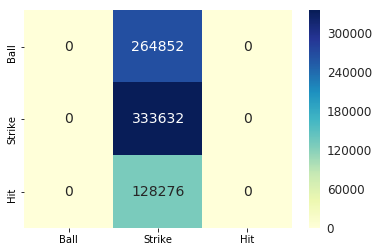

In [11]:
generate_confusion_matrix(test_y, pred_y)

# Baseline 2
We explore the effect of combining strike, balls as single categorical variable.

In [12]:
cum_ctrs = {}
for i in range(train_y.shape[0]):
    b = str(train_x[i, -2])
    s = str(train_x[i, -1])
    lab = b + ' ' + s

    if lab not in cum_ctrs:
        cum_ctrs[lab] = [0,0,0]
    else:
        cum_ctrs[lab][train_y[i]] += 1

In [14]:
prob_y = np.zeros((test_y.shape[0], 3))
for i in range(test_y.shape[0]):
    b = str(test_x[i, -2])
    s = str(test_x[i, -1])
    lab = b + ' ' + s
    prob_y[i,:] = cum_ctrs[lab] / np.sum(cum_ctrs[lab])

pred_y = np.argmax(prob_y, 1)

[[0.39246227 0.49766915 0.10986859]
 [0.4113208  0.40853509 0.18014411]
 [0.34413726 0.44197018 0.21389256]
 ...
 [0.28684167 0.46686302 0.24629531]
 [0.29437014 0.44631246 0.25931741]
 [0.39246227 0.49766915 0.10986859]]
[1 0 1 ... 1 1 1]


In [32]:
import math
def logit(p):
    denominator = ( 1 - p ) + 1e-5
    return np.log( (p + 1e-5) / denominator )
logit_prob_y = logit(prob_y)

In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(logit_prob_y, test_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
clf.score(logit_prob_y, test_y )

0.46632863668886565

In [ ]:
criterion(prob_y, test_y)

In [31]:
accuracy(pred_y, test_y)

0.46632863668886565

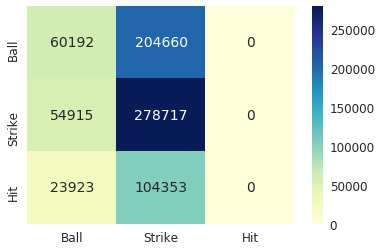

In [36]:
generate_confusion_matrix(test_y, clf.predict(logit_prob_y))

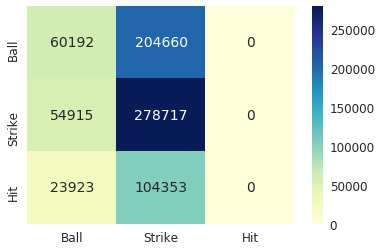

In [35]:
generate_confusion_matrix(test_y, pred_y)